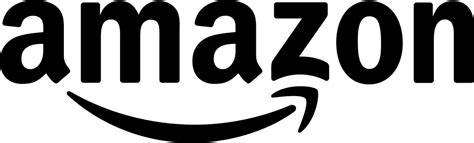

In [1]:
#import libraries

from bs4 import BeautifulSoup
import requests 
import smtplib
import time
import datetime

In [2]:
# Connect to Website and pull in the data

URL = 'https://www.amazon.in/OnePlus-Nord-Blue-128GB-Storage/dp/B097RD2JX8/ref=sr_1_3?crid=P8E80U3VJ907&keywords=oneplus%2Bnord%2Bce%2B5g%2B8gb%2B128gb&qid=1637158883&qsid=261-0624069-4679068&sprefix=one%2Bplus%2Bnord%2Caps%2C308&sr=8-3&sres=B095PYTSV8%2CB09576CYNP%2CB097RD2JX8%2CB0992C9B69%2CB097RDVDL2%2CB09F9S8G7H%2CB09F9RWWVC%2CB08444S68L%2CB0992B8CDH%2CB096LS7N6Z%2CB09JG89LHZ%2CB09LH5HLT7%2CB07WJV5KPL%2CB09LHNTYB9%2CB09KV9DZH7%2CB09KVD9F4H&srpt=CELLULAR_PHONE&th=1'

headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

page = requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

Title = soup2.find(id='productTitle').get_text()

Price = soup2.find(id='priceblock_dealprice').get_text()


print(Title)
print(Price)


            OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB Storage)
           

               ₹29,999.00
              


In [3]:
# Clean up the data a little bit

price = Price.strip()[1:]
title = Title.strip()

print(title)
print(price)

OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB Storage)
29,999.00


In [4]:
# Create a Timestamp for your output to track when data was collected

import datetime

today = datetime.date.today()

print(today)

2021-11-17


In [5]:
# Create CSV and write headers and data into the file

import csv 

header = ['Title', 'Price', 'Date']
data = [title, price, today]


with open('AmazonOneplusDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [6]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Anjali\AmazonOneplusDataset.csv')

print(df)


                                               Title      Price        Date
0  OnePlus Nord 2 5G (Blue Haze, 8GB RAM, 128GB S...  29,999.00  2021-11-17


In [7]:
#appending data to the csv

with open('AmazonOneplusDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [ ]:
#Combine all of the above code into one function


def check_price():
    URL = 'https://www.amazon.in/OnePlus-Nord-Blue-128GB-Storage/dp/B097RD2JX8/ref=sr_1_3?crid=P8E80U3VJ907&keywords=oneplus%2Bnord%2Bce%2B5g%2B8gb%2B128gb&qid=1637158883&qsid=261-0624069-4679068&sprefix=one%2Bplus%2Bnord%2Caps%2C308&sr=8-3&sres=B095PYTSV8%2CB09576CYNP%2CB097RD2JX8%2CB0992C9B69%2CB097RDVDL2%2CB09F9S8G7H%2CB09F9RWWVC%2CB08444S68L%2CB0992B8CDH%2CB096LS7N6Z%2CB09JG89LHZ%2CB09LH5HLT7%2CB07WJV5KPL%2CB09LHNTYB9%2CB09KV9DZH7%2CB09KVD9F4H&srpt=CELLULAR_PHONE&th=1'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    Title = soup2.find(id='productTitle').get_text()

    Price = soup2.find(id='priceblock_dealprice').get_text()

    price = Price.strip()[1:]
    title = Title.strip()

    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonOneplusDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [11]:
# Runs check_price after a set time and inputs data into your CSV

while(True):
    check_price()
    time.sleep(5) # or you can set value of 1 day ie. 86400

PermissionError: [Errno 13] Permission denied: 'AmazonOneplusDataset.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Anjali\AmazonOneplusDataset.csv')

print(df)

In [ ]:
# If uou want to try sending yourself an email (just for fun) when a price hits below a certain level you can try it
# out with this script

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('anzali1228@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Mobile Phone you want is below 29,999.00/- Now is your chance to buy!"
    body = "Anjali, This is the moment you have been waiting for. Now is your chance to pick up the Mobile for which you were saving. Don't mess it up! Link here:https://www.amazon.in/OnePlus-Nord-Blue-128GB-Storage/dp/B097RD2JX8/ref=sr_1_3?crid=P8E80U3VJ907&keywords=oneplus%2Bnord%2Bce%2B5g%2B8gb%2B128gb&qid=1637158883&qsid=261-0624069-4679068&sprefix=one%2Bplus%2Bnord%2Caps%2C308&sr=8-3&sres=B095PYTSV8%2CB09576CYNP%2CB097RD2JX8%2CB0992C9B69%2CB097RDVDL2%2CB09F9S8G7H%2CB09F9RWWVC%2CB08444S68L%2CB0992B8CDH%2CB096LS7N6Z%2CB09JG89LHZ%2CB09LH5HLT7%2CB07WJV5KPL%2CB09LHNTYB9%2CB09KV9DZH7%2CB09KVD9F4H&srpt=CELLULAR_PHONE&th=1"

    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'anzali1228@gmail.com',
        msg
     
    )